In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import time
#import math
#importing packages
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Loading data 

In [2]:
name = "DF_CURATED_2022_12_7_11.csv"

In [3]:
df = pd.read_csv('..\\Extraction\\DATA_cURATED\\'+name)

In [4]:
df.index=df["Date"]

In [5]:
df.drop(["Date"],1,inplace=True)

C:\Users\PCALAT~1\AppData\Local\Temp/ipykernel_37908/1022212316.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(["Date"],1,inplace=True)


In [6]:
df.head(2)

,Y_next_daily_returns,simple_daily_returns,Close,Volume,log_daily_returns,day-of-week,week-of-year,month-of-year,day_volatility_%,gold_returns,...,VIX_returns,US_returns,GDP,CPILFESL,PCE,UMCSENT,INDPRO,IPMAN,MACD_Signal,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2002-07-18,-0.038352,-0.026385,881.559998,1736300000,0.026739,3,29,7,0.030888,0.0,...,-0.002273,-0.000765,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-20.428083,24.627836
2002-07-19,-0.032922,-0.038352,847.750000,2654100000,0.039107,4,29,7,0.046896,0.0,...,0.048051,0.002408,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-22.343688,21.351079


In [7]:
df.tail(2)

,Y_next_daily_returns,simple_daily_returns,Close,Volume,log_daily_returns,day-of-week,week-of-year,month-of-year,day_volatility_%,gold_returns,...,VIX_returns,US_returns,GDP,CPILFESL,PCE,UMCSENT,INDPRO,IPMAN,MACD_Signal,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-26,0.019819,0.018381,4057.840088,4709970000,-0.018214,3,21,5,0.022722,0.003804,...,-0.032372,-0.001862,0.020533,0.006314,0.006748,-0.104294,-0.001019,-0.004148,-99.659048,45.972021
2022-05-27,-0.004563,0.019819,4158.240234,4375620000,-0.019625,4,21,5,0.019880,0.001623,...,-0.064727,-0.000492,0.020533,0.006314,0.006748,-0.104294,-0.001019,-0.004148,-93.079233,60.686509


In [8]:
df = df.dropna()

In [9]:
df.shape

(4981, 25)

In [10]:
list(df.keys())

['Y_next_daily_returns',
 'simple_daily_returns',
 'Close',
 'Volume',
 'log_daily_returns',
 'day-of-week',
 'week-of-year',
 'month-of-year',
 'day_volatility_%',
 'gold_returns',
 'oil_returns',
 'treasury_13w_returns',
 'treasury_10y_returns',
 'nasdaq_returns',
 'dowJones_returns',
 'VIX_returns',
 'US_returns',
 'GDP',
 'CPILFESL',
 'PCE',
 'UMCSENT',
 'INDPRO',
 'IPMAN',
 'MACD_Signal',
 'RSI']

In [11]:
X=df.copy()

In [12]:
# 70% train/test split
split = int(len(X) * 0.7)

In [13]:
X_train = X[:split]

## 2. Spliting the data in 3 categories

#### The goal is to find the down_threshold and the up_threshold that splits the data set in 3 balanced categories

In [14]:
n = len(X_train["Y_next_daily_returns"])

In [15]:
m=int(n/3)

In [16]:
m

1162

In [17]:
n

3486

In [18]:
down_threshold = min(X_train["Y_next_daily_returns"])
up_threshold = max(X_train["Y_next_daily_returns"])

In [19]:
down_threshold = -0.002350998250686522

In [20]:
up_threshold = 0.00367005877974454

In [21]:
#while ((X_train["Y_next_daily_returns"]<=down_threshold).sum())<m:
#    down_threshold=down_threshold+0.00001    
#while ((X_train["Y_next_daily_returns"]>=up_threshold).sum())<m:
#    up_threshold=up_threshold-0.00001

In [22]:
print("Threshold to consider a DOWN prediction: ", down_threshold)

Threshold to consider a DOWN prediction:  -0.002350998250686522


In [23]:
print("Threshold to consider an UP prediction: ", up_threshold)

Threshold to consider an UP prediction:  0.00367005877974454


In [24]:
n_up=(X_train["Y_next_daily_returns"]>=up_threshold).sum()
n_up

1162

In [25]:
n_down=(X_train["Y_next_daily_returns"]<=down_threshold).sum()
n_down

1162

In [26]:
n_lateral = len(X_train["Y_next_daily_returns"])-(X_train["Y_next_daily_returns"]<=down_threshold).sum()-(X_train["Y_next_daily_returns"]>=up_threshold).sum()
n_lateral

1162

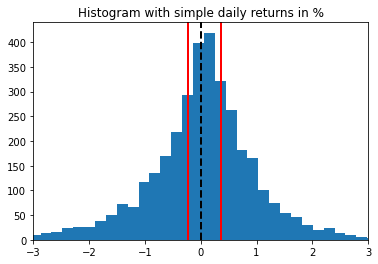

In [27]:
plt.hist(X_train["Y_next_daily_returns"]*100, bins=100)
plt.axvline(down_threshold*100, color='r', linestyle='solid', linewidth=2)
plt.axvline(up_threshold*100, color='r', linestyle='solid', linewidth=2)
plt.title("Histogram with simple daily returns in %")
plt.axvline(0, color='k', linestyle='--', linewidth=2)
plt.xlim([-3, 3])
plt.show()

In [28]:
#It is interesting that close to the peak there are more positive values but at the tails there are more negative values

## Labeling classes

In [29]:
label=[]
for i in range(len(X["Y_next_daily_returns"])):

    if X["Y_next_daily_returns"][i]<=down_threshold:
        
        label.append("down")
        
    elif X["Y_next_daily_returns"][i]>down_threshold and X["Y_next_daily_returns"][i]<up_threshold:
    
        label.append("lateral")
        
    elif X["Y_next_daily_returns"][i]>=up_threshold:
        label.append("up")


In [30]:
#Testing that all the returns are classified correctly
my_list = list(set(label))
my_list

['down', 'up', 'lateral']

In [31]:
df["Y_label"]=label
df= df[ ["Y_label"] + [ col for col in df.columns if col != "Y_label" ]]

In [32]:
df.head(10)

,Y_label,Y_next_daily_returns,simple_daily_returns,Close,Volume,log_daily_returns,day-of-week,week-of-year,month-of-year,day_volatility_%,...,VIX_returns,US_returns,GDP,CPILFESL,PCE,UMCSENT,INDPRO,IPMAN,MACD_Signal,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2002-07-18,down,-0.038352,-0.026385,881.559998,1736300000,0.026739,3,29,7,0.030888,...,-0.002273,-0.000765,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-20.428083,24.627836
2002-07-19,down,-0.032922,-0.038352,847.750000,2654100000,0.039107,4,29,7,0.046896,...,0.048051,0.002408,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-22.343688,21.351079
2002-07-22,down,-0.027017,-0.032922,819.849976,2248060000,0.033476,0,30,7,0.050255,...,0.070023,0.003929,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-24.872814,20.786866
2002-07-23,up,0.057314,-0.027017,797.700012,2441020000,0.027389,1,30,7,0.039642,...,0.062692,0.007462,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-27.915234,20.657899
2002-07-24,down,-0.005620,0.057314,843.429993,2775560000,-0.055732,2,30,7,0.088490,...,-0.172514,-0.007244,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-30.291201,31.330634
2002-07-25,up,0.016884,-0.005620,838.679993,2424700000,0.005636,3,30,7,0.046219,...,-0.033948,-0.001615,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-32.141147,21.718514
2002-07-26,up,0.054078,0.016884,852.840027,1796100000,-0.016743,4,30,7,0.020253,...,-0.080290,0.012152,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-33.272124,26.832644
2002-07-29,up,0.004249,0.054078,898.960022,1778650000,-0.052667,0,31,7,0.054078,...,-0.075538,0.003749,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-33.098415,40.708546
2002-07-30,up,0.009792,0.004249,902.780029,1826090000,-0.004240,1,31,7,0.028382,...,-0.003745,-0.003545,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-31.997111,46.615660


In [33]:
df.tail(10)

,Y_label,Y_next_daily_returns,simple_daily_returns,Close,Volume,log_daily_returns,day-of-week,week-of-year,month-of-year,day_volatility_%,...,VIX_returns,US_returns,GDP,CPILFESL,PCE,UMCSENT,INDPRO,IPMAN,MACD_Signal,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-16,up,0.009094,-0.001248,4008.010010,4415030000,0.001249,0,20,5,0.015680,...,-0.084638,-0.002680,0.020533,0.006314,0.006748,-0.104294,-0.001019,-0.004148,-95.918640,41.064213
2022-05-17,down,-0.031664,0.009094,4088.850098,4841410000,-0.009053,1,20,5,0.014078,...,-0.035833,-0.007776,0.020533,0.006314,0.006748,-0.104294,-0.001019,-0.004148,-97.143953,45.280326
2022-05-18,lateral,0.000459,-0.031664,3923.679932,5103220000,0.032176,2,20,5,0.035806,...,0.157816,0.004548,0.020533,0.006314,0.006748,-0.104294,-0.001019,-0.004148,-99.051228,32.986652
2022-05-19,down,-0.006721,0.000459,3900.790039,5113550000,-0.000459,3,20,5,0.017897,...,-0.060499,-0.010691,0.020533,0.006314,0.006748,-0.104294,-0.001019,-0.004148,-101.425396,37.659884
2022-05-20,up,0.013862,-0.006721,3901.360107,5130730000,0.006744,4,20,5,0.034931,...,0.022585,0.002430,0.020533,0.006314,0.006748,-0.104294,-0.001019,-0.004148,-103.727483,36.098779
2022-05-23,lateral,-0.000370,0.013862,3973.750000,4420030000,-0.013767,0,21,5,0.018634,...,-0.017253,-0.009221,0.020533,0.006314,0.006748,-0.104294,-0.001019,-0.004148,-104.472357,39.557946
2022-05-24,up,0.012505,-0.000370,3941.479980,4923190000,0.000370,1,21,5,0.020786,...,0.000680,-0.002448,0.020533,0.006314,0.006748,-0.104294,-0.001019,-0.004148,-104.478889,29.468935
2022-05-25,up,0.018381,0.012505,3978.729980,4802560000,-0.012428,2,21,5,0.018930,...,-0.032731,0.002850,0.020533,0.006314,0.006748,-0.104294,-0.001019,-0.004148,-103.189868,38.901348
2022-05-26,up,0.019819,0.018381,4057.840088,4709970000,-0.018214,3,21,5,0.022722,...,-0.032372,-0.001862,0.020533,0.006314,0.006748,-0.104294,-0.001019,-0.004148,-99.659048,45.972021


In [34]:
name = "3_CLASS_" + ""+name
name

'3_CLASS_DF_CURATED_2022_12_7_11.csv'

In [35]:
path = "./Data_Transformed_3_Class/"
save_name = path + name
save_name

'./Data_Transformed_3_Class/3_CLASS_DF_CURATED_2022_12_7_11.csv'

In [36]:
df.to_csv(save_name, encoding='utf-8')